<a href="https://colab.research.google.com/github/vrangayyan6/Machine-Learning/blob/main/LinkedIn_Algo_Trading_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('microsoft_linkedin_processed.csv', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow,change_direction_tomorrow
Date,,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,55.402447,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,56.274220,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,56.455826,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,57.191380,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,56.918953,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...,...
2024-09-27,431.519989,431.850006,427.470001,428.019989,428.019989,14896100,0.529863,UP
2024-09-30,428.209991,430.420013,425.369995,430.299988,430.299988,16807300,-2.284339,DOWN
2024-10-01,428.450012,428.480011,418.809998,420.690002,420.690002,19092900,-0.853450,DOWN


In [ ]:
target = df.change_direction_tomorrow
inputs = df.drop(columns=['change_tomorrow','change_direction_tomorrow'])

In [ ]:
target

,change_direction_tomorrow
Date,
2016-12-08,UP
2016-12-09,UP
2016-12-12,UP
2016-12-13,DOWN
2016-12-14,DOWN
...,...
2024-09-27,UP
2024-09-30,DOWN
2024-10-01,DOWN


In [ ]:
inputs

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,55.402447,21220800
2016-12-09,61.180000,61.990002,61.130001,61.970001,56.274220,27349400
2016-12-12,61.820000,62.299999,61.720001,62.169998,56.455826,20198100
2016-12-13,62.500000,63.419998,62.240002,62.980000,57.191380,35718900
2016-12-14,63.000000,63.450001,62.529999,62.680000,56.918953,30352700
...,...,...,...,...,...,...
2024-09-27,431.519989,431.850006,427.470001,428.019989,428.019989,14896100
2024-09-30,428.209991,430.420013,425.369995,430.299988,430.299988,16807300
2024-10-01,428.450012,428.480011,418.809998,420.690002,420.690002,19092900


In [ ]:
n_days = len(df.index)
n_days

1967

In [ ]:
n_days_split = int(n_days * 0.7)
n_days_split

1376

In [ ]:
X_train, y_train = inputs[:n_days_split], target[:n_days_split]
X_test, y_test = inputs[n_days_split:], target[n_days_split:]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=20)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [ ]:
from sklearn.tree import plot_tree

[Text(0.6773400757443252, 0.9761904761904762, 'Open <= 334.7\ngini = 0.496\nsamples = 1376\nvalue = [624, 752]'),
 Text(0.3919935843244714, 0.9285714285714286, 'High <= 65.195\ngini = 0.495\nsamples = 1351\nvalue = [605.0, 746.0]'),
 Text(0.5346668300343983, 0.9523809523809523, 'True  '),
 Text(0.053482587064676616, 0.8809523809523809, 'Close <= 64.45\ngini = 0.488\nsamples = 64\nvalue = [37, 27]'),
 Text(0.03731343283582089, 0.8333333333333334, 'Low <= 63.51\ngini = 0.498\nsamples = 49\nvalue = [23, 26]'),
 Text(0.01990049751243781, 0.7857142857142857, 'Adj Close <= 56.665\ngini = 0.492\nsamples = 39\nvalue = [22, 17]'),
 Text(0.009950248756218905, 0.7380952380952381, 'Low <= 62.075\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.004975124378109453, 0.6904761904761905, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.014925373134328358, 0.6904761904761905, 'High <= 62.85\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.009950248756218905, 0.6428571428571429, 'gini = 0.0\

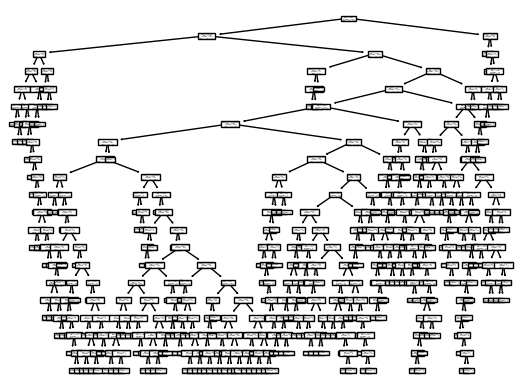

In [ ]:
plot_tree(model_dt, feature_names=model_dt.feature_names_in_)

In [ ]:
y_pred = model_dt.predict(X_test)

In [ ]:
y_pred

array(['UP', 'DOWN', 'UP', 'UP', 'DOWN', 'UP', 'UP', 'DOWN', 'UP', 'UP',
       'UP', 'UP', 'DOWN', 'DOWN', 'DOWN', 'UP', 'UP', 'UP', 'UP', 'UP',
       'UP', 'DOWN', 'UP', 'UP', 'UP', 'UP', 'DOWN', 'UP', 'UP', 'UP',
       'UP', 'UP', 'UP', 'DOWN', 'UP', 'UP', 'UP', 'UP', 'DOWN', 'UP',
       'UP', 'DOWN', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP',
       'DOWN', 'DOWN', 'UP', 'DOWN', 'UP', 'UP', 'DOWN', 'DOWN', 'UP',
       'UP', 'UP', 'DOWN', 'DOWN', 'UP', 'UP', 'UP', 'UP', 'UP', 'DOWN',
       'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'DOWN', 'UP', 'UP', 'UP',
       'UP', 'DOWN', 'DOWN', 'UP', 'UP', 'DOWN', 'DOWN', 'UP', 'DOWN',
       'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'DOWN', 'UP', 'UP',
       'UP', 'UP', 'UP', 'DOWN', 'UP', 'UP', 'UP', 'DOWN', 'UP', 'UP',
       'UP', 'UP', 'DOWN', 'DOWN', 'DOWN', 'UP', 'DOWN', 'UP', 'UP', 'UP',
       'UP', 'DOWN', 'UP', 'DOWN', 'DOWN', 'UP', 'UP', 'UP', 'DOWN', 'UP',
       'UP', 'UP', 'UP', 'UP', 'UP', 'DOWN', 'UP', 'UP', 

In [ ]:
df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predictions

,Actual,Predicted
Date,,
2022-05-27,DOWN,UP
2022-05-31,UP,DOWN
2022-06-01,UP,UP
2022-06-02,DOWN,UP
2022-06-03,DOWN,DOWN
...,...,...
2024-09-27,UP,DOWN
2024-09-30,DOWN,DOWN
2024-10-01,DOWN,DOWN


In [ ]:
model_dt.score(X_test, y_test)

0.505922165820643

In [ ]:
import pickle

In [ ]:
with open('model_dt.pkl', 'wb') as f:
    pickle.dump(model_dt, f)